In [4]:
!pip3 install albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 KB 2.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 43.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 KB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 19.9 MB/s eta 0:00:00


In [ ]:
import torch
from mde.data.mono_dataset import KITTIRAWDataset
import matplotlib.pyplot as plt
import lightning as L
from torch import utils
from training_module import MDE,MyCallback
import matplotlib.pyplot as plt
from lightning.pytorch.loggers import TensorBoardLogger
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from torchvision.transforms.functional import resize

mde = MDE()

logger = TensorBoardLogger("tb_logs", name="mde")
dataset = KITTIRAWDataset('/app/data/data_depth_annotated/2011_09_26',
                                            100,332,
                                           # [0], 1,drives=[23], is_train=True)
                                           # [0], 1,drives=[1,2,23,27,19], is_train=True)
                                           [0], 1,drives=[52,57,59,60,61,64,117,28,1,2,5,13,39], is_train=True)
dataset_val = KITTIRAWDataset('/app/data/data_depth_annotated/2011_09_26',
                                            100,332,
                                           [0], 1,drives=[113,84], is_train=False)
train_loader = utils.data.DataLoader(dataset, batch_size=16, shuffle=True, num_workers=24)
val_loader = utils.data.DataLoader(dataset_val, batch_size=16, shuffle=False, num_workers=24)
trainer = L.Trainer( max_epochs=26,log_every_n_steps=5,callbacks=[EarlyStopping(monitor="g_val_loss",patience=3, mode="min"),MyCallback(dataset_val[38][0])],logger=logger)
trainer.fit(model=mde, train_dataloaders=train_loader,val_dataloaders=val_loader)



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 24 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - C

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_msssim/ssim.py:48: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  out = conv(out, weight=win.transpose(2 + i, -1), stride=1, padding=0, groups=C)
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

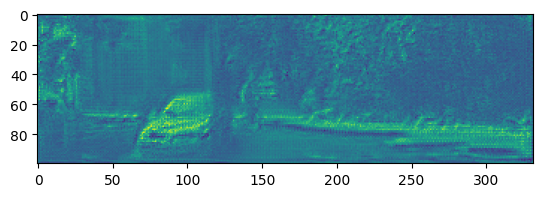

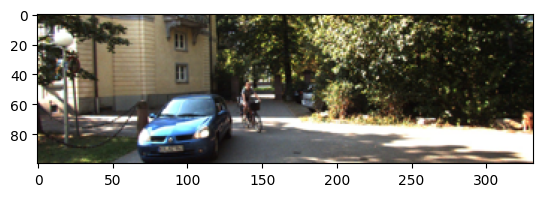

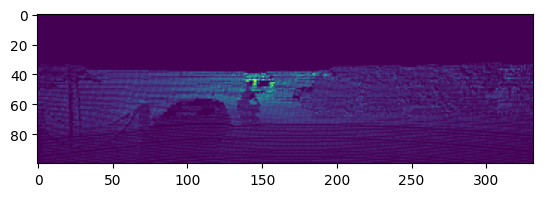

In [3]:
# %matplotlib inline
i=10

plt.imshow(mde.mde_unet(dataset_val[i][0].unsqueeze(0)).squeeze(0).permute(1,2,0).detach().numpy())
plt.show()
plt.imshow(dataset_val[i][0].squeeze(0).permute(1,2,0).detach().numpy() )
plt.show()
plt.imshow(dataset_val[i][1].squeeze(0).permute(2,0,1).detach().numpy() )
plt.show()

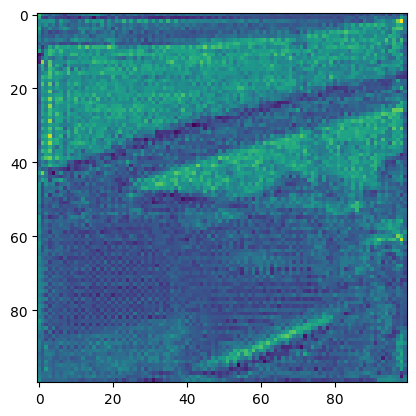

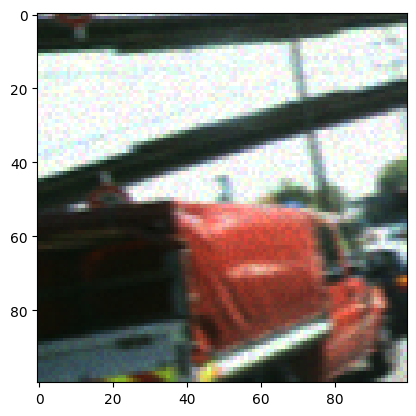

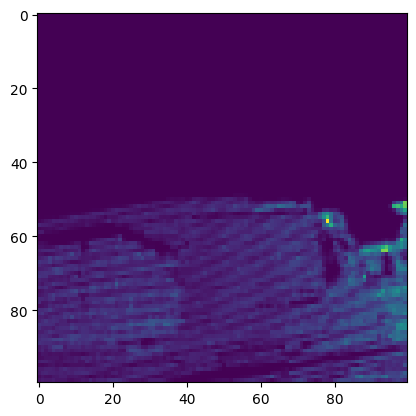

In [7]:
# %matplotlib inline
i=67
a = dataset[i]
plt.imshow(mde.mde_unet(a[0].unsqueeze(0)).detach().squeeze(0).permute(1,2,0).detach().numpy())
plt.show()
plt.imshow(a[0].detach().squeeze(0).permute(1,2,0).numpy() )
plt.show()
plt.imshow(a[1].detach().squeeze(0).numpy() )
plt.show()

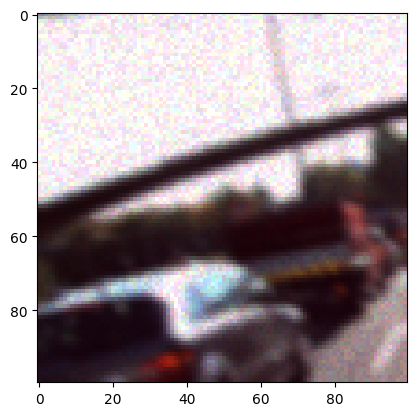

In [2]:
plt.imshow(dataset[0][0].permute(1,2,0))

In [ ]:
from PIL import Image
import numpy as np

imgs_p = [mde.mde_unet(d[0].unsqueeze(0)).squeeze(0).permute(1,2,0).squeeze(0).detach().numpy() for d in dataset_val]
imgs_p = ((imgs_p/np.max(imgs_p))*255.0).astype(np.uint8)

imgs = [(d[0].squeeze(0).permute(1,2,0).detach().numpy() * 255).astype(np.uint8) for d in dataset_val]


imgs = [Image.fromarray(np.concatenate([i,np.repeat(j, 3, axis=2)],axis=0)) for i,j in zip(imgs,imgs_p)]
imgs[0].save("/app/array_small.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

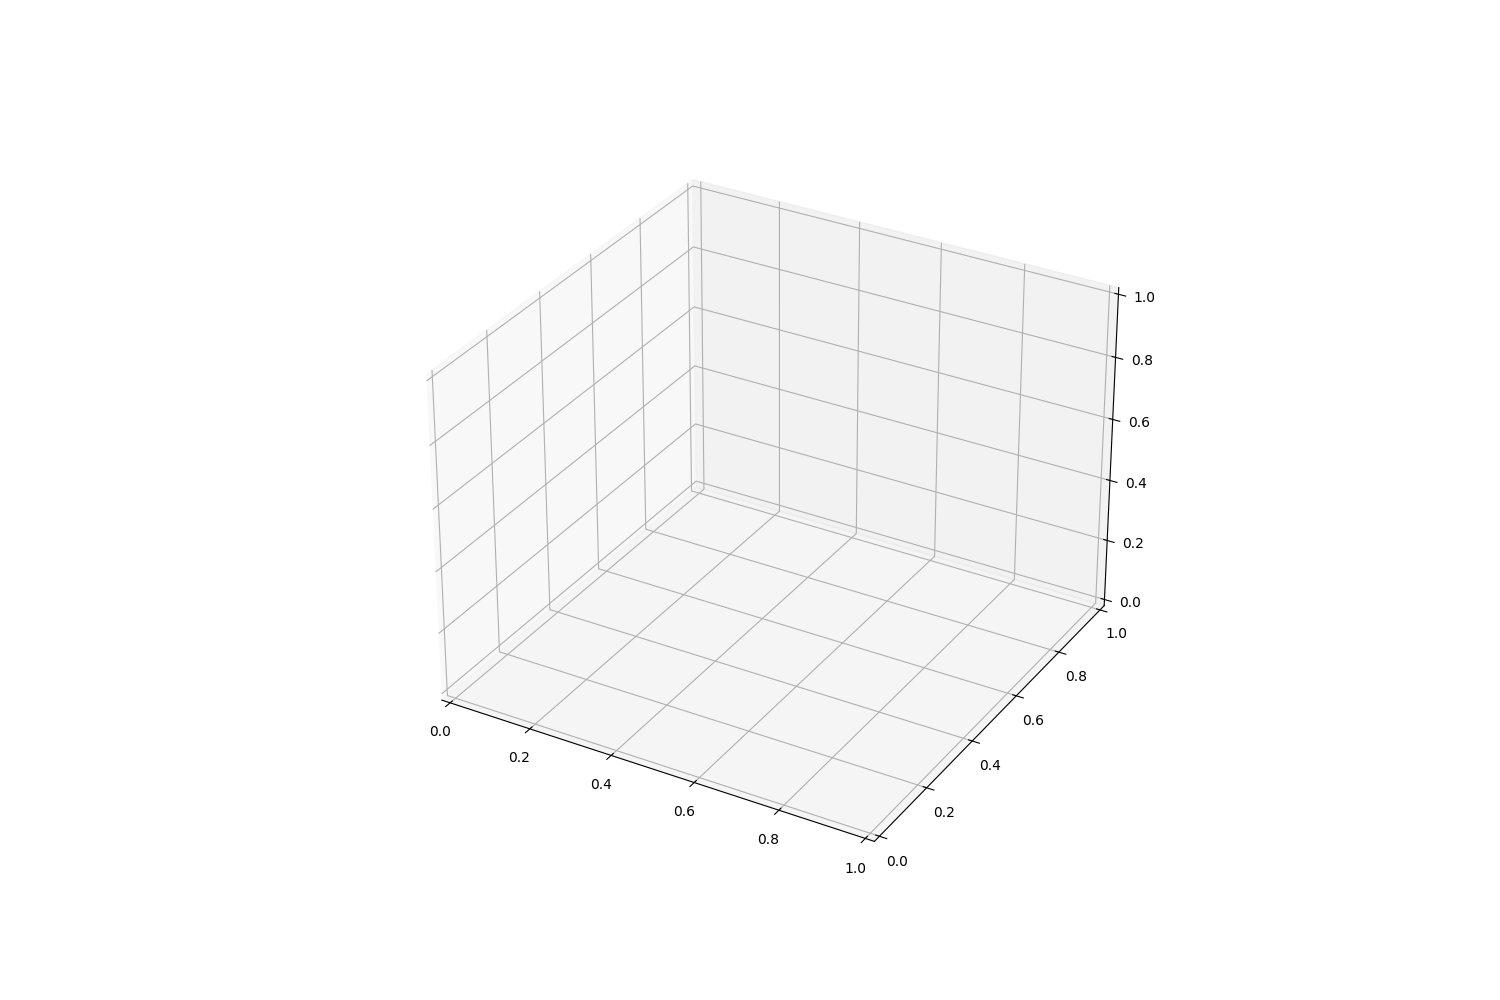

In [4]:
%matplotlib widget 
import numpy as np
from matplotlib import cm
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection="3d")

img=mde.mde_unet(dataset_val[0][0].unsqueeze(0)).squeeze(0).permute(1,2,0).squeeze(-1).detach().numpy()
X, Y = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]))
ax.plot_surface(
    X,
    Y,
    img[X,Y],
    cmap=cm.coolwarm
   
)
ax.axis('equal')
plt.show()
